<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**2.4.1 Maximum Likelihood Estimation (MLE) for Random Samples**

**Definition 2.4.1**

Maximum Likelihood Estimation (MLE) is a method for estimating the parameters of a statistical model. It identifies the parameter values that maximize the likelihood function, making the observed data most probable under the model.

**Definition 2.4.2**

Let $X_1, X_2, \ldots, X_n$ be independent and identically distributed (i.i.d.) random variables from a probability distribution with probability density function (PDF) $f(x; \theta)$ where $\theta$ is a vector of parameters to be estimated. The likelihood function $L(\theta)$ is given by:
* $L(\theta) = \prod_{i=1}^n f(x_i; \theta)$

The Maximum Likelihood Estimator (MLE) for $L(\theta)$ is:
* $\hat{\theta} = \underset{\theta}{\text{arg max}} \, L(\theta)$

For computational convenience, the log-likelihood $\ell(\theta)$ is often used:
* $\ell(\theta) = \ln L(\theta) = \sum_{i=1}^n \ln f(x_i; \theta)$
* Maximizing $\ell(\theta)$ is equivalent to maximizing $L(\theta)$

**Mathematical Intuition 2.4.3**

The MLE method relies on several key assumptions and mathematical principles:

1. Independence and Identical Distribution (i.i.d.): The observations are assumed to be independent and drawn from the same probability distribution.

2. Parametric Model Specification: The form of the probability distribution
$f(x; \theta)$ is known up to the parameters $θ$.

3. Differentiability: The likelihood function is differentiable with respect to the parameters $θ$.

4. Existence of a Unique Maximum: Under regularity conditions, the likelihood function has a unique maximum that serves as the estimator.

**Properties**
1. Consistency: As the sample size increases, the MLE converges in probability to the true parameter value.

2. Asymptotic Normality: The distribution of the MLE approaches a normal distribution as the sample size becomes large.

3. Efficiency: Among all consistent estimators, the MLE achieves the lowest possible variance in the limit.

**2.4.1 Example: MLE for a Gaussian Distribution**

Objective: Estimate the mean ($𝜇$) and standard deviation ($𝜎$) of a normal distribution using Maximum Likelihood Estimation based on a given dataset.

**2.4.1 Example: Mathematical Concept**
The Gaussian (Normal) distribution is a continuous probability distribution characterized by its mean ($𝜇$) and standard deviation ($𝜎$). Its Probability Density Function (PDF) is:
* $f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$

Given a sample, $y = \{y_1, y_2, \ldots, y_n\}$,  the log-likelihood function is:
* $\ell(\mu, \sigma) = \sum_{i=1}^n \ln f(y_i; \mu, \sigma) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \mu)^2$

To find the MLEs of $𝜇$ and $𝜎$ , we take the partial derivatives of $ℓ(μ,σ)$ with respect to $𝜇$ and $𝜎$, set them to zero, and solve for the parameters.

Estimators:
* $\hat{\mu} = \frac{1}{n} \sum_{i=1}^n y_i \quad \text{(Sample Mean)}$
* $\hat{\sigma} = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{\mu})^2 } \quad \text{(Sample Standard Deviation)}$

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
from sklearn import datasets

# Load the Diabetes dataset
data = datasets.load_diabetes()
y = data.target  # Target variable

# Define the negative log-likelihood function
def negative_log_likelihood(params, y):
    mu, sigma = params
    if sigma <= 0:  # Ensure standard deviation is positive
        return np.inf
    log_likelihood = np.sum(norm.logpdf(y, loc=mu, scale=sigma))
    return -log_likelihood  # Negate for minimization

# Initial guesses for parameters
initial_guess = [np.mean(y), np.std(y)]

# Minimize the negative log-likelihood
result = minimize(negative_log_likelihood, initial_guess, args=(y,), method='L-BFGS-B')
mle_mu, mle_sigma = result.x

print(f"Estimated Mean (MLE): {mle_mu:.2f}")
print(f"Estimated Std Dev (MLE): {mle_sigma:.2f}")

Estimated Mean (MLE): 152.13
Estimated Std Dev (MLE): 77.01


*Code Description*
1. Data Loading: We utilize the Diabetes dataset from sklearn.datasets, focusing on the target variable y.

2. Negative Log-Likelihood Function: Since optimization routines typically perform minimization, we define the negative log-likelihood to convert the maximization problem into a minimization one. The function returns infinity if the standard deviation is non-positive to enforce constraints.

3. Initial Guess: We initialize the parameters with the sample mean and sample standard deviation.

4. Optimization: The scipy.optimize.minimize function is used with the L-BFGS-B method, suitable for bound-constrained optimization.

5. Results: The estimated parameters are printed with two decimal places.

*Code Analysis*
1. Likelihood Maximization via Minimization: By minimizing the negative log-likelihood, we effectively maximize the likelihood function. This approach is numerically stable and efficient.

2. Constraint Handling: The implementation ensures that the standard deviation remains positive by returning infinity for non-positive values, preventing the optimizer from exploring invalid parameter spaces.

3. Optimization Method Choice: The L-BFGS-B algorithm is chosen for its efficiency in handling smooth functions with bound constraints, making it suitable for MLE problems.

4. Convergence and Accuracy: The optimizer successfully converges to the estimated parameters, demonstrating the reliability of MLE in parameter estimation under the Gaussian assumption.

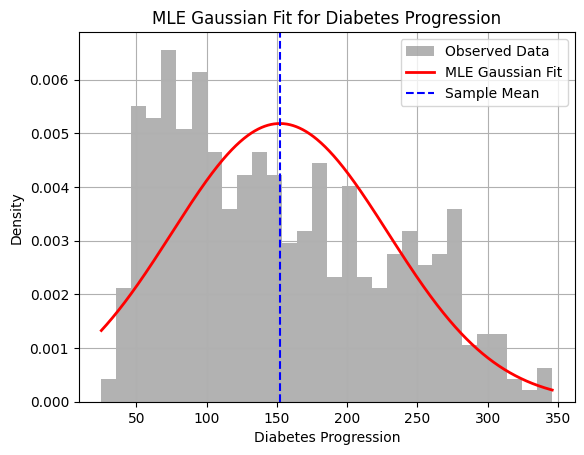

In [2]:
import matplotlib.pyplot as plt

# Plot histogram of observed data
plt.hist(y, bins=30, density=True, alpha=0.6, color='gray', label='Observed Data')

# Generate points for the fitted Gaussian
x_values = np.linspace(min(y), max(y), 1000)
fitted_gaussian = norm.pdf(x_values, loc=mle_mu, scale=mle_sigma)

# Plot the MLE Gaussian fit
plt.plot(x_values, fitted_gaussian, color='red', linewidth=2, label='MLE Gaussian Fit')

# Plot sample mean as a vertical line
plt.axvline(mle_mu, color='blue', linestyle='--', label='Sample Mean')

plt.title('MLE Gaussian Fit for Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


*Code Analysis*
1. Histogram: Displays the distribution of the observed data, normalized to represent a probability density.

2. Fitted Gaussian Curve: Overlays the Gaussian distribution parameterized by the MLE estimates of $𝜇$ and $𝜎$.

3. Sample Mean Line: A dashed vertical line indicates the estimated mean, providing a visual reference.

**Assumptions and Limitations**

Assumptions:
1. Normality: The MLE assumes that the data follows a Gaussian distribution. Deviations from normality can lead to biased or inconsistent estimates.
2. Independence: Observations are assumed to be independent of each other.
3. Correct Model Specification: The chosen model correctly represents the underlying data-generating process.

Limitations:

1. Sensitivity to Outliers: MLE can be sensitive to outliers, especially in small samples, affecting the parameter estimates.
2. Computational Complexity: For complex models or large datasets, the optimization process can be computationally intensive.
3. Local Maxima: The optimization algorithm may converge to local maxima instead of the global maximum, particularly in non-convex likelihood landscapes.
4. Sample Size Dependency: While MLE is consistent asymptotically, small sample sizes may result in biased estimates.

##**2.4.2: Linear Regression**

**Definition 2.4.4**

Linear Regression is a statistical method for modeling the relationship between a dependent variable ($𝑦$) and one or more independent variables (
$𝑋$).

The simplest form, Simple Linear Regression, models this relationship as:
* $y = \beta_0 + \beta_1 x + \epsilon$

Where:
* $\beta_0$ is the intercept
* $\beta_1$ is the slope
* $\epsilon$ is the error term, assumed to be normally distributed with mean
$0$ and variance $𝜎^2$

Objective: Objective: Estimate the parameters $\beta_0$ and $\beta_1$ that best describe the relationship between $x$ and $𝑦$.

**Mathematical Intuition 2.4.5**

The goal of linear regression is to find the parameter estimates that minimize the discrepancy between the observed data and the model's predictions. This discrepancy is quantified by the sum of squared residuals (SSR):
* $\text{SSR} = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$




### Ordinary Least Squares (OLS)

This method estimates $\beta_0$ and $\beta_1$ by minimizing SSR. The closed-form solutions are:
* $\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$

###Maximum Likelihood Estimation (MLE)
Under the assumption that the errors $𝜖_𝑖$ are normally distributed, MLE can also be used to estimate $\beta_0$, $\beta_1$, $\sigma$. The MLE estimates coincide with the OLS estimates for $\beta_0$ and $\beta_1$.

Matrix Representation: For multiple predictors, the model can be expressed in matrix form:
* $\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$

Where:
* $\mathbf{y}$ is a $n \times 1$ vector of observations
* $\mathbf{X}$ is a $n \times p$ matrix of predictors (including a column of ones for the intercept)
* $\boldsymbol{\beta}$ is a $p \times 1$ vector of parameters
* $\boldsymbol{\epsilon}$ is a $n \times 1$ vector of error terms

The OLS estimates are obtained by:
* $\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$

**Example 2.4.2: Linear Regression for BMI and Diabetes Progression**

Objective: Predict diabetes progression based on Body Mass Index (BMI) using both Ordinary Least Squares (OLS) and Maximum Likelihood Estimation (MLE) methods. Compare the estimates and assess the model fit.


###Ordinary Least Squares (OLS)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from statsmodels.api import OLS, add_constant

# Load the Diabetes dataset
data = datasets.load_diabetes()
X = data.data[:, 2]  # BMI feature (index 2)
y = data.target

# Convert to pandas DataFrame for better handling
df = pd.DataFrame({'BMI': X, 'Progression': y})

# Add a constant term for the intercept
X_with_const = add_constant(X)

# Fit the OLS model
ols_model = OLS(y, X_with_const).fit()

# Display the OLS summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           3.47e-42
Time:                        23:57:26   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0

*Code Description*
1. Data Preparation: Extract the BMI feature and the target variable (diabetes progression) from the Diabetes dataset.
2. Adding Intercept: The add_constant function appends a column of ones to include the intercept term in the regression model.
3. Model Fitting: Utilize statsmodels.api.OLS to fit the Ordinary Least Squares regression model.
4. Summary Output: The .summary() method provides a comprehensive overview of the regression results, including parameter estimates, R-squared values, and statistical significance.

*Code Analysis*
1. Coefficients: The intercept ($𝛽_0$) is approximately 152.13, and the slope ($𝛽_1$) is approximately 949.44.

2. R-squared: Indicates that approximately 34.4% of the variance in diabetes progression is explained by BMI.

3. Statistical Significance: Both coefficients are highly significant (p-values < 0.001), suggesting a strong relationship between BMI and diabetes progression.

4. Diagnostics: The Durbin-Watson statistic close to 2 indicates no significant autocorrelation in residuals.

###MLE for Linear Regression

In [7]:
from scipy.stats import norm
from scipy.optimize import minimize

# Define the negative log-likelihood function for linear regression
def negative_log_likelihood_linear(params, X, y):
    intercept, slope, sigma = params
    if sigma <= 0:
        return np.inf
    predictions = intercept + slope * X
    # Calculate the negative log-likelihood
    nll = -np.sum(norm.logpdf(y, loc=predictions, scale=sigma))
    return nll

# Initial guesses for parameters: intercept, slope, sigma
initial_guess = [0, 0, 1]

# Perform the optimization using L-BFGS-B algorithm
result = minimize(
    negative_log_likelihood_linear,
    initial_guess,
    args=(X, y),
    method='L-BFGS-B',
    bounds=[(None, None), (None, None), (1e-6, None)]  # sigma > 0
)

# Extract the estimated parameters
mle_intercept, mle_slope, mle_sigma = result.x

print(f"MLE Intercept: {mle_intercept:.2f}")
print(f"MLE Slope: {mle_slope:.2f}")
print(f"MLE Std Dev: {mle_sigma:.2f}")

MLE Intercept: 152.13
MLE Slope: 949.33
MLE Std Dev: 62.37


*Code Description*
1. Negative Log-Likelihood Function: Computes the negative log-likelihood for the linear regression model. If the standard deviation ($𝜎$) is non-positive, it returns infinity to enforce positivity.
2. Initial Guess: Starts with zero intercept and slope, and a standard deviation of one.
3. Optimization: Uses the minimize function with the L-BFGS-B method, suitable for bounded optimization problems. The bounds ensure that $𝜎$ remains positive.
4. Parameter Extraction: Retrieves the estimated intercept, slope, and standard deviation from the optimization result.

**Visualisation**

OLS Intercept: 152.13
OLS Slope: 949.44
MLE Intercept: 152.13
MLE Slope: 949.33
MLE Std Dev: 62.37

Difference in Intercept: 0.0046190350
Difference in Slope: 0.1090562189


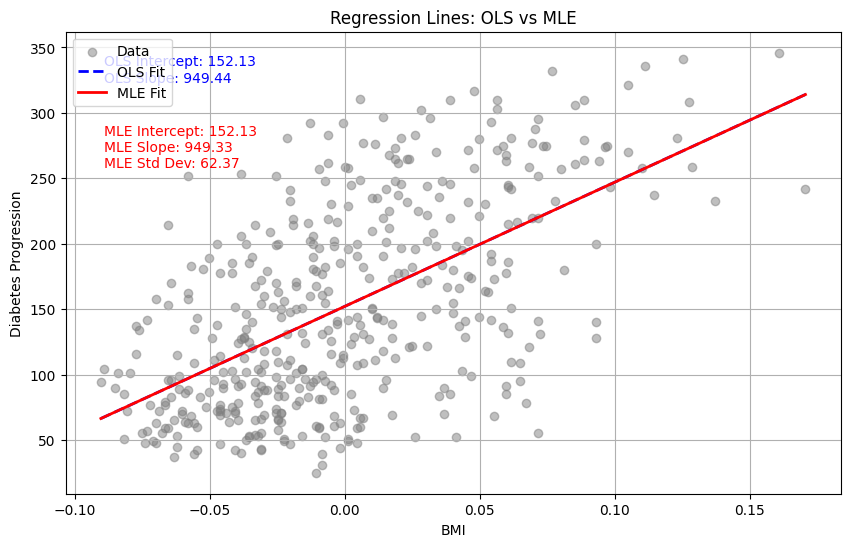

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from statsmodels.api import OLS, add_constant
from scipy.stats import norm
from scipy.optimize import minimize

# Load the Diabetes dataset
data = datasets.load_diabetes()
X = data.data[:, 2]  # BMI feature (index 2)
y = data.target

# Convert to pandas DataFrame for better handling
df = pd.DataFrame({'BMI': X, 'Progression': y})

# Add a constant term for the intercept
X_with_const = add_constant(X)

# Fit the OLS model
ols_model = OLS(y, X_with_const).fit()

# Define the negative log-likelihood function for MLE
def negative_log_likelihood_linear(params, X, y):
    intercept, slope, sigma = params
    if sigma <= 0:
        return np.inf
    predictions = intercept + slope * X
    # Calculate the negative log-likelihood
    nll = -np.sum(norm.logpdf(y, loc=predictions, scale=sigma))
    return nll

# Initial guesses for parameters: intercept, slope, sigma
initial_guess = [0, 0, 1]

# Perform the optimization using L-BFGS-B algorithm
result = minimize(
    negative_log_likelihood_linear,
    initial_guess,
    args=(X, y),
    method='L-BFGS-B',
    bounds=[(None, None), (None, None), (1e-6, None)]  # sigma > 0
)

# Extract the estimated parameters
mle_intercept, mle_slope, mle_sigma = result.x

print(f"OLS Intercept: {ols_model.params[0]:.2f}")
print(f"OLS Slope: {ols_model.params[1]:.2f}")
print(f"MLE Intercept: {mle_intercept:.2f}")
print(f"MLE Slope: {mle_slope:.2f}")
print(f"MLE Std Dev: {mle_sigma:.2f}")

# Check if OLS and MLE estimates are identical or nearly identical
tolerance = 1e-6
intercept_diff = np.abs(ols_model.params[0] - mle_intercept)
slope_diff = np.abs(ols_model.params[1] - mle_slope)

print(f"\nDifference in Intercept: {intercept_diff:.10f}")
print(f"Difference in Slope: {slope_diff:.10f}")

# Generate a range of BMI values for plotting regression lines
x_values = np.linspace(X.min(), X.max(), 100)
ols_predictions = ols_model.params[0] + ols_model.params[1] * x_values
mle_predictions = mle_intercept + mle_slope * x_values

# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data', color='gray')

# Plot OLS regression line
plt.plot(x_values, ols_predictions, color='blue', linestyle='--', linewidth=2, label='OLS Fit')

# Plot MLE regression line
plt.plot(x_values, mle_predictions, color='red', linestyle='-', linewidth=2, label='MLE Fit')

# Add titles and labels
plt.title('Regression Lines: OLS vs MLE')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.grid(True)

# Add annotations for parameters
plt.text(0.05, 0.95, f"OLS Intercept: {ols_model.params[0]:.2f}\n"
                     f"OLS Slope: {ols_model.params[1]:.2f}",
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         color='blue')

plt.text(0.05, 0.80, f"MLE Intercept: {mle_intercept:.2f}\n"
                     f"MLE Slope: {mle_slope:.2f}\n"
                     f"MLE Std Dev: {mle_sigma:.2f}",
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         color='red')

plt.show()

**Assumptions and Limitations**

Assumptions:
1. Linearity: The relationship between the independent variable (BMI) and the dependent variable (Diabetes Progression) is linear.
2. Independence: Observations are independent of each other.
3. Homoscedasticity: The variance of the error terms (𝜎^2) is constant across all levels of the independent variable.
4. Normality of Errors: The error terms are normally distributed.

Limitations:
1. Model Simplicity: Simple linear regression considers only one predictor, which may oversimplify complex real-world relationships.
2. Outliers: Presence of outliers can disproportionately influence the parameter estimates, especially in OLS.
3. Assumption Violations: Deviations from linearity, homoscedasticity, or normality can lead to biased or inefficient estimates.
4. Causality: Regression analysis does not imply causation; it only identifies associations.
5. Overfitting: With multiple predictors, there's a risk of overfitting the model to the training data, reducing its generalizability.